In [327]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Load Data liver

In [328]:
data = pd.read_csv('data_liver.csv')
data = data.rename(index=str, columns={"65": "Ages",
                                       "Female": "Gender",
                                       "0.7": "TB",
                                       "0.1": "DB",
                                       "187": "AAP",
                                       "16": "SGPT",
                                       "18": "SGOT",
                                       "6.8": "TP",
                                       "3.3" : "ALB",
                                       "0.9" : "A/G",
                                       "1" : "Diagnosis"
                                      })
data.head()

,Ages,Gender,TB,DB,AAP,SGPT,SGOT,TP,ALB,A/G,Diagnosis
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [329]:
data.to_csv("liver.csv")

# Data Pre-Processing
## Fill Missing Value

In [330]:
data.isnull().any()

Ages         False
Gender       False
TB           False
DB           False
AAP          False
SGPT         False
SGOT         False
TP           False
ALB          False
A/G           True
Diagnosis    False
dtype: bool

In [331]:
data.fillna(data.mean(), inplace = True)

C:\Users\Bahar Andili\AppData\Local\Temp\ipykernel_8992\2513612827.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace = True)


In [332]:
data.isnull().any()

Ages         False
Gender       False
TB           False
DB           False
AAP          False
SGPT         False
SGOT         False
TP           False
ALB          False
A/G          False
Diagnosis    False
dtype: bool

# Plot Perbandingan Data Desease dan Healthy

With Desease :
      TB   DB  AAP  SGPT  SGOT   TP  ALB   A/G
0  10.9  5.5  699    64   100  7.5  3.2  0.74
1   7.3  4.1  490    60    68  7.0  3.3  0.89
Without Desease :
      TB   DB  AAP  SGPT  SGOT   TP  ALB  A/G
7   0.9  0.3  202    22    19  7.4  4.1  1.2
11  0.9  0.3  310    61    58  7.0  3.4  0.9


,Chemicals,Mean_Values,Status
0,TB,3.543342,Desease
1,DB,1.590966,Desease
2,AAP,299.860574,Desease
3,SGPT,87.711227,Desease
4,SGOT,123.631332,Desease
5,TP,6.468877,Desease
6,ALB,3.123394,Desease
7,A/G,0.943923,Desease
8,TB,3.139768,Healthy
9,DB,1.437066,Healthy


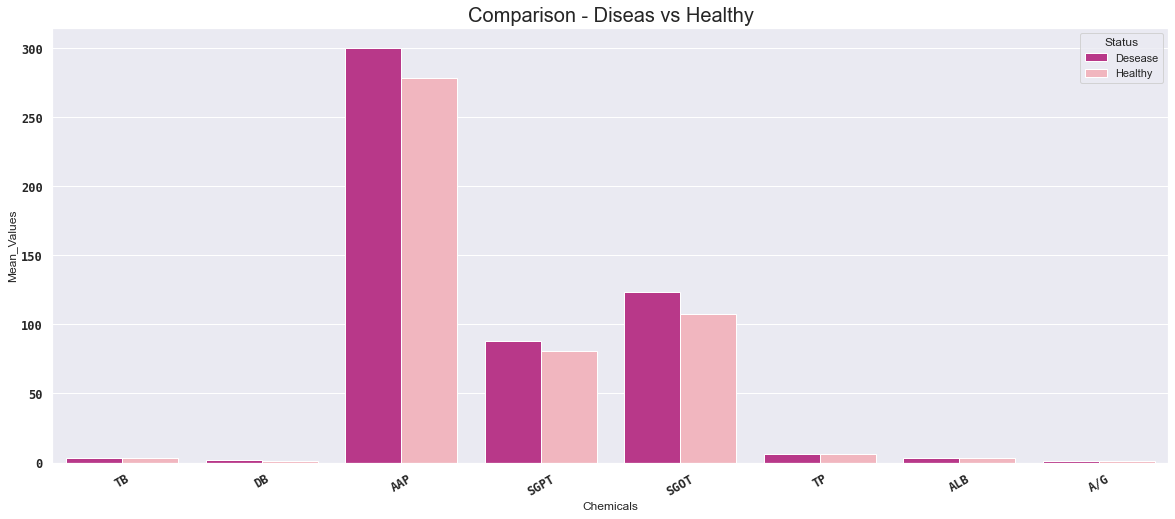

In [333]:
with_desease = data[data['Diagnosis']==1]
with_desease = with_desease.drop(columns=['Gender','Ages','Diagnosis'])
names1 = with_desease.columns.unique()
mean_of_feature = with_desease.mean(axis=0, skipna=True)


without_desease = data[data['Diagnosis']==2]
without_desease = without_desease.drop(columns=['Gender','Ages','Diagnosis'])
names2 = without_desease.columns.unique()
mean_of_feature2 = without_desease.mean(axis=0, skipna=True)


print("With Desease :\n", with_desease.head(2))
print("Without Desease :\n", without_desease.head(2))


people =[]

for x, y in zip(names1, mean_of_feature):
    people.append([x,y,'Desease'])

for x, y in zip(names2, mean_of_feature2):
    people.append([x,y,'Healthy'])
    
    
    #
new_data = pd.DataFrame(people, columns=['Chemicals','Mean_Values','Status'])


fig = plt.figure(figsize=(20, 8))
plt.title("Comparison - Diseas vs Healthy", size = 20, loc='center')
plt.xticks(
    rotation = 30,
    weight = 'bold',
    family= 'monospace',
    size ='large'
        
)
plt.yticks(
    weight='bold',
    family = 'monospace',
    size = 'large'
)

g1 = sns.barplot(
    x = 'Chemicals', 
    y='Mean_Values', 
    hue='Status', 
    data= new_data, 
    palette="RdPu_r"
)
new_data

# Plot Perbandingan Total Male Female dan Desease dan Healthy

[None, None, None, None]

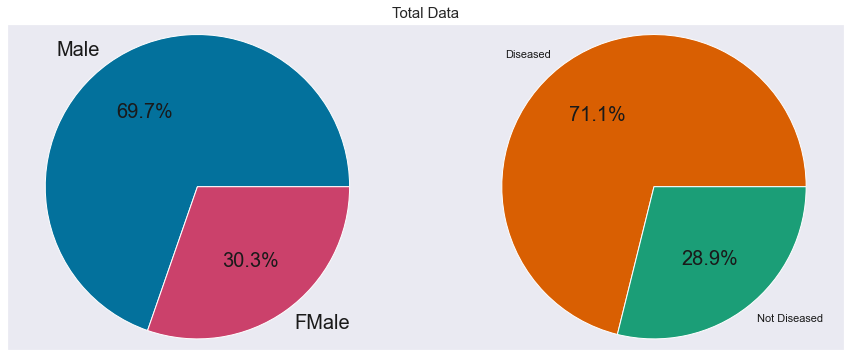

In [334]:
fig = plt.figure(figsize=(15, 6), frameon=False)
plt.title("Total Data", loc='center', weight=10, size=15)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


only_geder = data["Gender"]

male_tot = only_geder[only_geder=='Male']

no_of_male = len(male_tot)
no_of_fmale = len(data)-len(male_tot)

m_vs_f = [no_of_male, no_of_fmale]

with_disease = data[data['Diagnosis']==1]
not_with_disease = data[data['Diagnosis']==2]

#with_desease =  with_desease["Gender"]

no_of_disease = len(with_desease)
no_of_not_disease = len(data)-len(with_desease)

d_vs_healty = [no_of_disease, no_of_not_disease]

ax1.axis('equal')
ax2.axis('equal')

wedges, texts, autotext = ax1.pie(
    m_vs_f,
    labels = ('Male','FMale'),
    radius=1,
    textprops = dict(color='k'),
    colors=['xkcd:ocean blue','xkcd:dark pink'],
    autopct = "%1.1f%%"
)
wedges2, texts2, autotext2 =ax2.pie(
    d_vs_healty,
    labels=('Diseased','Not Diseased'),
    radius = 1,
    textprops=dict(color='k'),
    colors = ["#d95f02","#1b9e77"],
    autopct = "%1.1f%%"
)

plt.setp(autotext, size=20)
plt.setp(texts, size=20)

plt.setp(autotext2, size=20)
plt.setp(autotext2, size=20)

## Label encoder

In [335]:
le = LabelEncoder()
data.Gender = le.fit_transform(data.Gender)
data.head()

,Ages,Gender,TB,DB,AAP,SGPT,SGOT,TP,ALB,A/G,Diagnosis
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1


## Split Data train dan data test

In [336]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1]
for u in range(len(y)):
    if y[u] == 2:
        y[u] = 0

C:\Users\Bahar Andili\AppData\Local\Temp\ipykernel_8992\1014469563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[u] = 0


In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.25)

## Skalakan Data

In [338]:
sc = StandardScaler()
X_train[:,2:] = sc.fit_transform(X_train[:,2:]) 
X_test[:,2:] = sc.fit_transform(X_test[:,2:]) 
print("\n-------------------------------------------------------------------------\n")
print("hasil transformasi nilai X_train : \n", X_train[:,2:])
print("\n-------------------------------------------------------------------------\n")
print("hasil transformasi nilai X_test : \n", X_test[:,2:])
print("\n-------------------------------------------------------------------------\n")


-------------------------------------------------------------------------

hasil transformasi nilai X_train : 
 [[-0.43663642 -0.50423233 -0.51979143 ... -0.53630471 -0.30786857
  -0.16183728]
 [-0.39208648 -0.43649813 -0.62158893 ...  0.84834901  0.46015447
   2.64494039]
 [ 0.26131254  0.24084391 -0.60122943 ... -1.27478669 -0.69188009
   0.15002691]
 ...
 [-0.40693646 -0.47036523 -0.40577823 ...  0.20217727  0.58815831
   0.6490096 ]
 [-0.40693646 -0.47036523 -0.42613773 ... -1.92095842 -1.71591082
  -1.09742984]
 [-0.40693646 -0.47036523 -0.59308563 ... -1.36709693 -0.81988393
   0.15002691]]

-------------------------------------------------------------------------

hasil transformasi nilai X_test : 
 [[ 0.18381632  0.18984043 -0.24039405 ...  0.65579768  0.25477487
  -0.43354647]
 [-0.46007898 -0.48197038 -0.57844283 ...  0.38126823  0.74050714
   0.48550302]
 [-0.46007898 -0.48197038 -0.68562903 ...  0.56428786  1.10480634
   1.09820267]
 ...
 [-0.50032244 -0.48197038 -0.726854

# Pemodelan dan Prediksi
## KNN Classifier

In [339]:
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, y_train)
y_pred_knn = classifier_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(classification_report(y_test, y_pred_knn))
print("------------------------------------------------------")
print("The accuracy KNN: \n = ", accuracy_knn)
print("------------------------------------------------------")

              precision    recall  f1-score   support

           0       0.27      0.14      0.18       207
           1       0.68      0.83      0.75       466

    accuracy                           0.62       673
   macro avg       0.48      0.49      0.47       673
weighted avg       0.56      0.62      0.58       673

------------------------------------------------------
The accuracy KNN: 
 =  0.6181277860326895
------------------------------------------------------


## GaussianNB

In [340]:
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
y_pred_nb = classifier_nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(classification_report(y_test, y_pred_nb))
print("------------------------------------------------------")
print("The accuracy Naive Bayes: \n = ", accuracy_nb)
print("------------------------------------------------------")

              precision    recall  f1-score   support

           0       0.19      0.01      0.03       207
           1       0.69      0.97      0.81       466

    accuracy                           0.68       673
   macro avg       0.44      0.49      0.42       673
weighted avg       0.54      0.68      0.57       673

------------------------------------------------------
The accuracy Naive Bayes: 
 =  0.6775631500742942
------------------------------------------------------


# Plot Perbandingan Akurasi

In [341]:
model_comparations =[['KNN', accuracy_knn*100],
                     ['Naive Bayes', accuracy_nb*100]]
                    

model_comparations_df = pd.DataFrame(model_comparations,
                                     columns=['Model','Accuracy']
                                    )

model_comparations_df

,Model,Accuracy
0,KNN,61.812779
1,Naive Bayes,67.756315


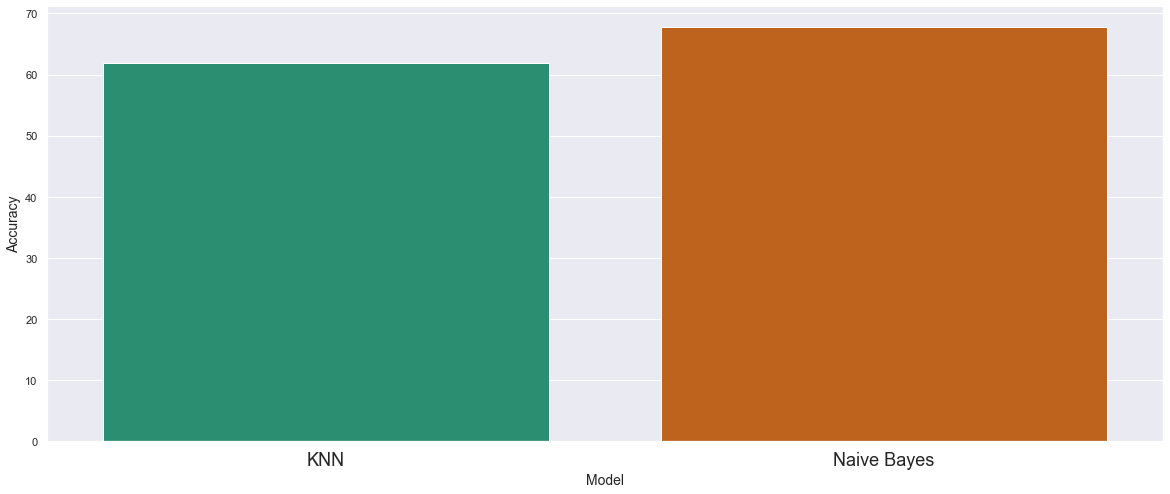

In [342]:
fig = plt.figure(figsize=(20,8))
sns.set()
sns.barplot(x='Model',
            y='Accuracy', 
            data=model_comparations_df,
            palette='Dark2'
           )

plt.xticks(size=18)
plt.ylabel('Accuracy', size=14)
plt.xlabel('Model', size=14)
plt.show()